In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MyFunc
import time

In [2]:
def Ax_Prob19(v):
    
    n = len(v)
    Ax = np.zeros(n)
    Ax[0] = -4.0*v[0] + v[1] + v[3]
    Ax[1] = v[0] - 4.0*v[1] + v[2] + v[4]
    Ax[2] = v[1] - 4.0*v[2] + v[5]
    Ax[3] = v[0] - 4.0*v[3] + v[4] + v[6]
    Ax[4] = v[1] + v[3] - 4.0*v[4] + v[5] + v[7]
    Ax[5] = v[2] + v[4] - 4.0*v[5] + v[8]
    Ax[6] = v[3] - 4.0*v[6] + v[7]
    Ax[7] = v[4] + v[6] - 4.0*v[7] + v[8]
    Ax[8] = v[5] + v[7] - 4.0*v[8]
    return Ax

In [3]:
def prob_19(T) :
    n = len(T)
    # create mesh
    Ax = np.zeros(n)

    # for indexing
    m = int(np.sqrt(n))

    # first vals
    Ax[0] = -4.0*T[0] + T[1] + T[m]

    # repeated vals
    for k in range(1, m - 1):
        Ax[k] = T[k - 1]-4.0*T[k] + T[k + 1] + T[k + m]
    k = m - 1
    
    #constant val
    Ax[k] = T[m - 2] - 4.0*T[m - 1] + T[2*m - 1]

    # surrounding points
    for i in range (1, m - 1):
        k = i*m

        # set p2
        Ax[k] = T[k - m] - 4.0*T[k] + T[k + 1] + T[k + m]
        for j in range(1, m - 1):
            k = i*m + j
            # set p3
            Ax[k] = T[k - m] + T[k - 1] - 4.0*T[k] + T[k + 1] + T[k + m]
        k = (i + 1)*m - 1
        Ax[k] = T[k - m] + T[k - 1] - 4.0*T[k] + T[k + m]
        k = (m - 1)*m
        Ax[k] = T[k - m] - 4.0*T[k] + T[k + 1]
        for j in range (1, m - 1):
            k = (m - 1)*m + j
            Ax[k] = T[k - m] + T[k - 1] - 4.0*T[k] + T[k + 1]
        k = m**2 - 1
        Ax[k] = T[k - m] + T[k - 1] - 4.0*T[k]

    # return mesh
    return Ax

In [9]:
b = np.array([[0],
              [0],
              [-100],
              [0],
              [0],
              [-100],
              [-200],
              [-200],
              [-300]], dtype = "float")

x0 = np.zeros(len(b))
t0 = time.perf_counter()
sol, i = MyFunc.conjGrad(Ax_Prob19, x0, b.flatten())
t1 = time.perf_counter()
tnet1 = t1 - t0

sol = sol.reshape([3,3])

# creating an empty array to store the reversed column matrix
matrix_2 = []
 
# looping through matrix_1 and appending matrix_2
for i in range(len(sol)):
    matrix_2.append(sol[i][::-1])

sol = matrix_2

sol = np.pad(np.copy(sol), 1)

print(sol)


[[  0.           0.           0.           0.           0.        ]
 [  0.          57.14285714  38.39285714  21.42857143   0.        ]
 [  0.          90.17857143  75.          47.32142857   0.        ]
 [  0.         128.57142857 124.10714286  92.85714286   0.        ]
 [  0.           0.           0.           0.           0.        ]]


[[ 50.           0.           0.           0.           0.        ]
 [100.          57.14285714  38.39285714  21.42857143   0.        ]
 [100.          90.17857143  75.          47.32142857   0.        ]
 [100.         128.57142857 124.10714286  92.85714286   0.        ]
 [150.         200.         200.         200.         100.        ]]


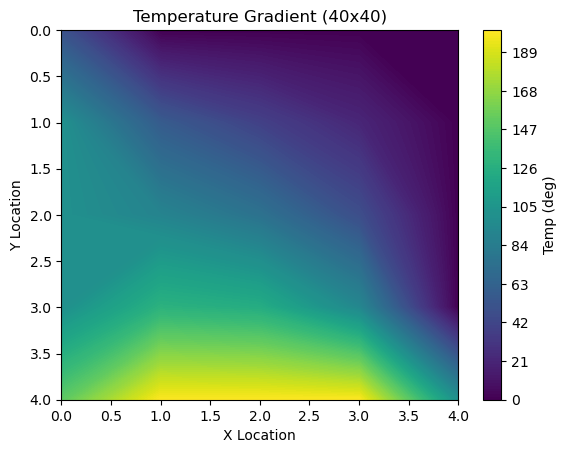

In [17]:

sol[:,0] = 100

sol[-1,:] = 200

sol[-1,0] = 150

sol[-1,-1] = 100

sol[0,0] = 50

print(sol)



# set up an xy grid to plot with
x = np.arange(0, 5)
y = x

# plot contour plot with magma because scary ooh
plt.contourf(x, y, sol, cmap="viridis", levels=150)
# invert axis to match problem diagram
plt.gca().invert_yaxis()
# formatting b/c yay
plt.xlabel("X Location")
plt.ylabel("Y Location")
plt.title("Temperature Gradient (40x40)")
plt.colorbar(label="Temp (deg)")
plt.show()

In [12]:
x = np.arange(0, 5, 1)

y = np.arange(0, 5, 1)

z = np.zeros((5,5))

n = len(z)

z[:,0] = 100

z[4,:] = 200

l = 0

for j in range(1,n-1):
    for i in range(2,n):
        z[j,n-i] = sol[l]
        l += 1

z[n-1,n-1] = 100

z[n-1,0] = 150

z[0,0] = 50

z = np.flip(z, axis=0)

X, Y = np.meshgrid(x,y)

fig, ax = plt.subplots()

# Plot x, y and z with viridis color theme

contour = ax.contourf(X, Y, z, cmap="viridis")

# Add colorbar, title, axes, labels

fig.colorbar(contour)
ax.set_title("3x3 Mesh")
ax.set_xlabel("T = 200 degrees")
ax.set_ylabel("T = 100 degrees")

plt.show(fig)

ValueError: setting an array element with a sequence.

In [20]:
import numpy as np

def b(n):
    # create array of long length
    # im doing 2d and then reshaping because its hard to visualize
    b = np.zeros((n, n), dtype="float64")

    # only need to do right side and bottom side and corner
    # go down right side except for last point
    b[:,-1] = -100

    # go along bottom side except for last point
    b[-1,:] = -200

    # set corner
    b[-1, -1] = -300

    # reshape b to be 1D
    b = b.flatten()

    return b

b1 = b(40)
x1 = np.zeros(len(b1))
t0 = time.perf_counter()
sol1, i = MyFunc.conjGrad(prob_19, x1, b1)
t1 = time.perf_counter()
tnet2 = t1 - t0
# reshape conjGrad output to be a 2D array
sol1 = sol1.reshape([40, 40])

# creating an empty array to store the reversed column matrix
matrix_2 = []
 
# looping through matrix_1 and appending matrix_2
for i in range(len(sol1)):
    matrix_2.append(sol1[i][::-1])

sol1 = matrix_2
# add wall temp values back
# pad matrix
sol1 = np.pad(np.copy(sol1), 1)


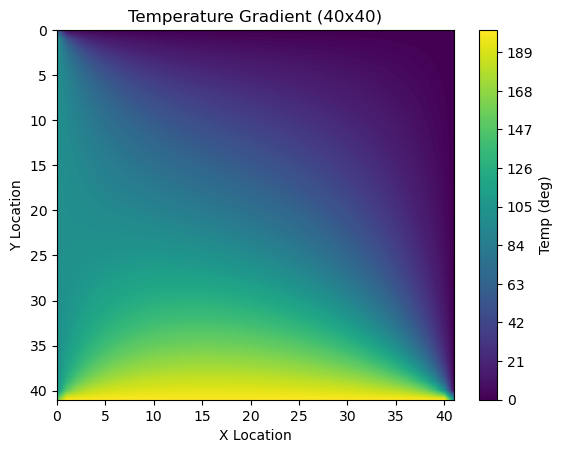

In [22]:

sol1[:,0] = 100

sol1[-1,:] = 200

sol1[-1,0] = 150

sol1[-1,-1] = 100

sol1[0,0] = 50

# set up an xy grid to plot with
x = np.arange(0, 42)
y = x

# plot contour plot with magma because scary ooh
plt.contourf(x, y, sol1, cmap="viridis", levels=150)
# invert axis to match problem diagram
plt.gca().invert_yaxis()
# formatting b/c yay
plt.xlabel("X Location")
plt.ylabel("Y Location")
plt.title("Temperature Gradient (40x40)")
plt.colorbar(label="Temp (deg)")
plt.show()

In [23]:
import numpy as np
import time
from tabulate import tabulate

table = [
    ["Mesh", "Time (seconds)"],
    ["3x3", tnet1],
    ["40x40", tnet2]
]

# Print the table
print(tabulate(table, headers="firstrow"))

Mesh      Time (seconds)
------  ----------------
3x3             0.000156
40x40           0.535357


In [24]:
print("Order of operations: ", np.log(tnet2/tnet1)/np.log(40/5))

Order of operations:  3.9149128312603736
